# pdf파일 text로 변환하여 워드 클라우드

## Beyond Containment: Health systems responses to COVID-19 in the OECD

In [4]:
!pip install pdfminer.six

In [11]:
import pandas as pd
import lxml.html
import requests

In [24]:
import pdfminer
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

#defining function 
#reference: http://www.blog.pythonlibrary.org/2018/05/03/exporting-data-from-pdfs-with-python/
def extract_text_from_pdf(pdf_path):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    with open(pdf_path, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()
    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

#executing function and printing text
text = extract_text_from_pdf(r'C:\장동원\강의자료\pm_7379_119_119689-ud5comtf84.pdf')
print(text)

   1 BEYOND CONTAINMENT: HEALTH SYSTEMS RESPONSES TO COVID 19 IN THE OECD © OECD 2020   Updated 16 April 2020 Health systems are facing the most serious global pandemic crisis in a century. Containing and mitigating the spread and infection rate of the coronavirus SARS-CoV-2 is the first priority of public health authorities to distribute the number of infections over time and, if possible, reduce the incidence of the disease it causes (COVID-19). However, beyond containment, additional measures – operational, financial, and R&D – are needed to provide effective patient care and reduce the pressure on health systems to manageable levels. The main focus of this brief is on the policies aimed at providing effective care and managing the pressure on health systems. Four key measures health systems are putting in place in response to the epidemic are considered: 1) ensuring access of the vulnerable to diagnostics and treatment; 2) strengthening and optimising health system capacity to res

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [26]:
tdm = cv.fit_transform([text]).toarray()
tdm

array([[12,  1,  1, ...,  1,  1,  1]], dtype=int64)

In [27]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})
df

,word,freq
0,000,12
1,00002,1
2,00201,1
3,0030,1
4,0057755,1
...,...,...
2138,year,10
2139,years,6
2140,zealand,1
2141,zero,1


In [28]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
980,health,178
1370,oecd,99
415,care,89
50,19,88
582,covid,86
68,2020,78
572,countries,64
1951,systems,54
607,data,52
1430,patients,49


In [29]:
from wordcloud import WordCloud

In [32]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [33]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [34]:
wc.fit_words(frequencies)

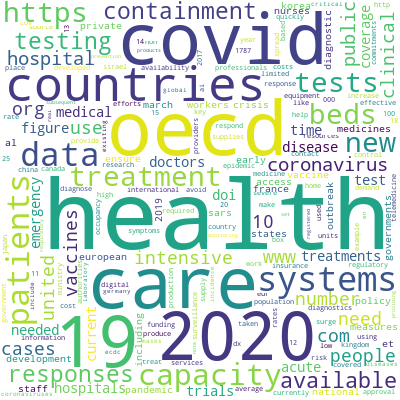

In [35]:
wc.to_image()